In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
tweets = pd.read_csv("TextNameGender.csv",names=['Tweet','Name','Gender'],skiprows=1)

#Shuffling the datasets
tweets = tweets.sample(frac=1).reset_index(drop=True)

In [ ]:
tweets.head()

,Tweet,Name,Gender
0,The United States has signed over 500 treaties...,Kamala Harris,Female
1,It's time to #FixTheSystem. https://t.co/Xeieh...,Barack Obama,Male
2,"Thank you, @AlexPadilla4CA, for calling it lik...",Kamala Harris,Female
3,Some great stories of big-hearted people comin...,Barack Obama,Male
4,"""After the worst economic crisis of our lifeti...",Barack Obama,Male


In [ ]:
gender_dataset = tweets[["Tweet","Gender"]]
person_dataset = tweets[["Tweet","Name"]]
person_dataset.head()

,Tweet,Name
0,The United States has signed over 500 treaties...,Kamala Harris
1,It's time to #FixTheSystem. https://t.co/Xeieh...,Barack Obama
2,"Thank you, @AlexPadilla4CA, for calling it lik...",Kamala Harris
3,Some great stories of big-hearted people comin...,Barack Obama
4,"""After the worst economic crisis of our lifeti...",Barack Obama


In [ ]:
gender_dataset.head()

,Tweet,Gender
0,The United States has signed over 500 treaties...,Female
1,It's time to #FixTheSystem. https://t.co/Xeieh...,Male
2,"Thank you, @AlexPadilla4CA, for calling it lik...",Female
3,Some great stories of big-hearted people comin...,Male
4,"""After the worst economic crisis of our lifeti...",Male


In [ ]:
X_tweet = np.array(gender_dataset["Tweet"])

y_gender = np.array(gender_dataset["Gender"])
y_person = np.array(person_dataset["Name"])

In [ ]:
#Tokenizing

from nltk.tokenize import TweetTokenizer
tweet_tokenizer = TweetTokenizer()

X_tokenize = list()

for tweet in X_tweet:
    X_tokenize.append(tweet_tokenizer.tokenize(tweet))


In [ ]:
#stop words + punctuation removal

import nltk 
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words("english")

import string
punctuations = list(string.punctuation)

stop_words = stop_words + punctuations

stop_words = stop_words + list('’“‚—')
#stop_words

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
#Lemmatisation
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

In [ ]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [ ]:
#Removing stop word and lemmatizing
X_clean = []
for i in range(len(X_tokenize)):
    temp = []
    for word in X_tokenize[i]:
        if word not in stop_words:
            clean_word = lemmatizer.lemmatize(word)
            temp.append(clean_word.lower())
    X_clean.append(temp)
#X_clean[:20]

In [ ]:
X_document = []
for doc in X_clean:
    X_document.append(" ".join(doc))
X_document[:5]

['the united states signed 500 treaty tribal nations broken every single one because action native american community lag behind others term health care education economic development together right https://t.co/ktarcednco',
 "it's time #fixthesystem https://t.co/xeiehw2uwa",
 "thank @alexpadilla4ca calling like it's disgraceful president united states trying undermine faith election https://t.co/mp6scfjzm5",
 'some great story big-hearted people coming new way come together even remaining apart help vulnerable face tough time ahead https://t.co/kcbqk915jo',
 'after worst economic crisis lifetime past five year economy created 12 million new job president obama']

Cross-validation for the hyperparameters of CountVectorization

In [ ]:
def error_plots(x_range,mean_error,std_error,x_name="",title_text=""):
    '''
    This function plot errorbars
    '''
    plt.xlabel(x_name,fontweight='bold')
    plt.ylabel("Accuracy Score",fontweight='bold')
    plt.title("Error Bar for "+title_text,fontweight='bold')
    plt.errorbar(x_range,mean_error,std_error)
    plt.show()

In [ ]:
#Cross-Validation for Logistic Regression C Value
from sklearn.linear_model import LogisticRegression

def cross_val_LR(X,y):
    '''
    This fucntion takes X data and y data, 
    trains Logistic regression model over the data
    and return the maximum mean accuracy,
    standard deviation associated with that maximum accuracy, 
    and the best model parameter value.
    '''

    C_range = [0.01,0.1,1,10,100]

    mean_accuracy=[]
    std_accuracy=[]

    for C_value in C_range:
        temp=[]
        for train,test in kf.split(X):
            model = LogisticRegression(C=C_value, max_iter=2000).fit(X[train],y[train])
            prediction = model.predict(X[test])
            temp.append(accuracy_score(y[test],prediction))
        mean_accuracy.append(np.array(temp).mean())
        std_accuracy.append(np.array(temp).std())

    return (C_range[mean_accuracy.index(max(mean_accuracy))],
            max(mean_accuracy),
            std_accuracy[mean_accuracy.index(max(mean_accuracy))])


In [ ]:
#Cross validation for KNN
from sklearn.neighbors import KNeighborsClassifier

def cross_val_KNN(X,y):
    '''
    This fucntion takes X data and y data, 
    trains KNN model over the data
    and return the maximum mean accuracy,
    standard deviation associated with that maximum accuracy, 
    and the best model parameter value.
    '''
    K_range = [2,3,4,5,6,7,8,9,10]

    mean_accuracy=[]
    std_accuracy=[]
    for K_value in K_range:
        temp=[]
        for train,test in kf.split(X):
            model = KNeighborsClassifier(n_neighbors=K_value).fit(X[train],y[train])
            prediction = model.predict(X[test])
            temp.append(accuracy_score(y[test],prediction))
        mean_accuracy.append(np.array(temp).mean())
        std_accuracy.append(np.array(temp).std())

    return ((K_range[mean_accuracy.index(max(mean_accuracy))],
             max(mean_accuracy),
            std_accuracy[mean_accuracy.index(max(mean_accuracy))]))

In [ ]:
#Cross-validation for SVM C Value
from sklearn.svm import LinearSVC

def cross_val_SVC(X,y):
    '''
    This fucntion takes X data and y data, 
    trains SVC over the data
    and return the maximum mean accuracy,
    standard deviation associated with that maximum accuracy, 
    and the best model parameter value.
    '''

    C_range = [0.01,0.1,1,10,100]

    mean_accuracy=[]
    std_accuracy=[]

    for C_value in C_range:
        temp=[]
        for train,test in kf.split(X):
            model = LinearSVC(C=C_value,max_iter=2000).fit(X[train],y[train])
            prediction = model.predict(X[test])
            temp.append(accuracy_score(y[test],prediction))
        mean_accuracy.append(np.array(temp).mean())
        std_accuracy.append(np.array(temp).std())
    
    return ((C_range[mean_accuracy.index(max(mean_accuracy))],
             max(mean_accuracy),
            std_accuracy[mean_accuracy.index(max(mean_accuracy))]))

In [ ]:
def accuracy_errorbar(accuracy_list,x_range,x_name, model_name = ""):
    '''
    This function doesn't plot errorbars but calls the error_bar function
    it is mainly used to segregate best parameters, max accuracy with it's
    standrad deviation
    '''
    accuracy_list = np.array(accuracy_list)
    (parameter_range, max_accuracy, max_std )= (accuracy_list[:,0],
                                                accuracy_list[:,1],
                                                accuracy_list[:,2])

    error_plots(x_range,max_accuracy, max_std,x_name+" range", model_name)

    max_accuracy_index = list(max_accuracy).index(max(max_accuracy))
    print("For "+model_name+"\n\tbest model parameter value = {}\n\tbest ".
          format(parameter_range[max_accuracy_index])+x_name+" value = {}\n\twith accuracy score = {}"
    .format(x_range[max_accuracy_index],max(max_accuracy)))


In [ ]:
#K-Fold Cross-validation 
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import CountVectorizer

#Using 5 splits for KFold
kf = KFold(n_splits = 5)

0.4


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.5


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.6


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.7


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.8


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.9


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


1


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


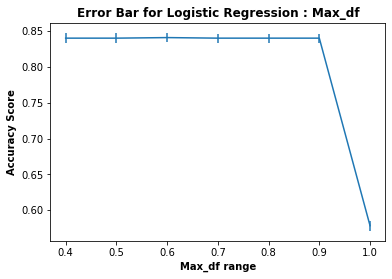

For Logistic Regression : Max_df
	best model parameter value = 1.0
	best Max_df value = 0.6
	with accuracy score = 0.8404185742315239


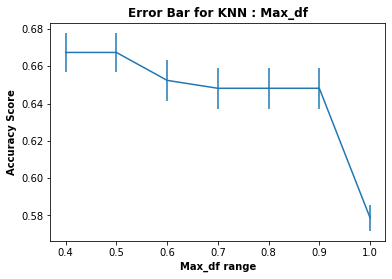

For KNN : Max_df
	best model parameter value = 2.0
	best Max_df value = 0.4
	with accuracy score = 0.6674296926095488


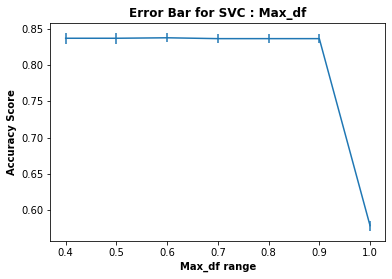

For SVC : Max_df
	best model parameter value = 0.1
	best Max_df value = 0.6
	with accuracy score = 0.8376716808371484


In [ ]:
#cross validation for Max_df
max_df_range = [0.4,0.5,0.6,0.7,0.8,0.9,1]


max_accuracy_LR = []
max_accuracy_KNN = []
max_accuracy_SVC = []

for max_df_value in max_df_range:
    count_vector = CountVectorizer(max_features=5000, ngram_range=(1,2), max_df = max_df_value)
    X_cross_features = count_vector.fit_transform(X_document)
    X_cross_features.todense()
    max_accuracy_LR.append(cross_val_LR(X_cross_features,y_gender))
    max_accuracy_KNN.append(cross_val_KNN(X_cross_features,y_gender))
    max_accuracy_SVC.append(cross_val_SVC(X_cross_features,y_gender))

accuracy_errorbar(max_accuracy_LR,max_df_range,"Max_df", "Logistic Regression : Max_df")
accuracy_errorbar(max_accuracy_KNN,max_df_range,"Max_df", "KNN : Max_df")
accuracy_errorbar(max_accuracy_SVC,max_df_range,"Max_df", "SVC : Max_df")

0


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.1


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.2


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.3


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.4


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


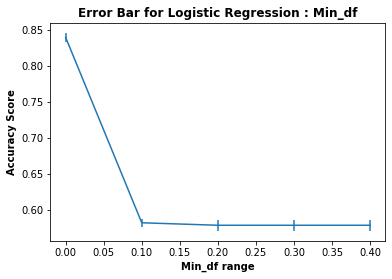

For Logistic Regression : Min_df
	best model parameter value = 1.0
	best Min_df value = 0
	with accuracy score = 0.8396337475474166


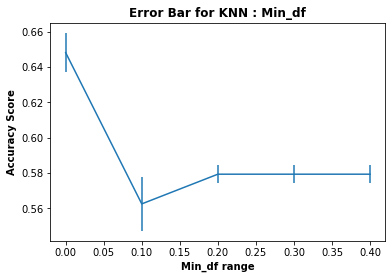

For KNN : Min_df
	best model parameter value = 2.0
	best Min_df value = 0
	with accuracy score = 0.6482014388489208


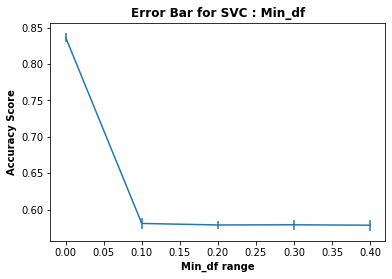

For SVC : Min_df
	best model parameter value = 0.1
	best Min_df value = 0
	with accuracy score = 0.8364944408109876


In [ ]:
#cross validation for Min_df
min_df_range = [0,0.1,0.2,0.3,0.4]
min_accuracy_LR = []
min_accuracy_KNN = []
min_accuracy_SVC = []

for min_df_value in min_df_range:
    count_vector = CountVectorizer(max_features=5000, ngram_range=(1,2), min_df = min_df_value)
    X_cross_features = count_vector.fit_transform(X_document)
    X_cross_features.todense()
    min_accuracy_LR.append(cross_val_LR(X_cross_features,y_gender))
    min_accuracy_KNN.append(cross_val_KNN(X_cross_features,y_gender))
    min_accuracy_SVC.append(cross_val_SVC(X_cross_features,y_gender))

accuracy_errorbar(min_accuracy_LR,min_df_range,"Min_df", "Logistic Regression : Min_df")
accuracy_errorbar(min_accuracy_KNN,min_df_range,"Min_df", "KNN : Min_df")
accuracy_errorbar(min_accuracy_SVC,min_df_range,"Min_df", "SVC : Min_df")

100


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


500


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


1000


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


2000


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


3000


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


5000


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


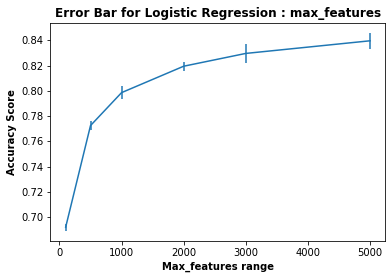

For Logistic Regression : max_features
	best model parameter value = 1.0
	best Max_features value = 5000
	with accuracy score = 0.8396337475474166


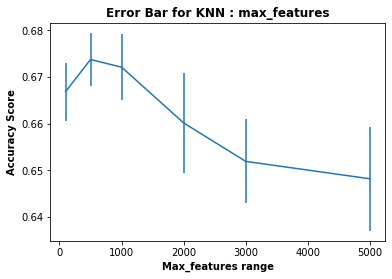

For KNN : max_features
	best model parameter value = 2.0
	best Max_features value = 500
	with accuracy score = 0.6737737083060825


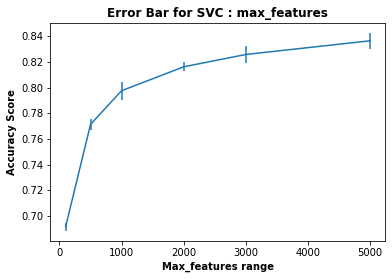

For SVC : max_features
	best model parameter value = 0.1
	best Max_features value = 5000
	with accuracy score = 0.8364944408109876


In [ ]:
#cross validation for Max_features
max_features_range = [100,500,1000,2000,3000,5000]


features_accuracy_LR = []
features_accuracy_KNN = []
features_accuracy_SVC = []

for max_features_value in max_features_range:
    count_vector = CountVectorizer(max_features=max_features_value, ngram_range=(1,2))
    X_cross_features = count_vector.fit_transform(X_document)
    X_cross_features.todense()
    features_accuracy_LR.append(cross_val_LR(X_cross_features,y_gender))
    features_accuracy_KNN.append(cross_val_KNN(X_cross_features,y_gender))
    features_accuracy_SVC.append(cross_val_SVC(X_cross_features,y_gender))

accuracy_errorbar(features_accuracy_LR,max_features_range,"Max_features", "Logistic Regression : max_features")
accuracy_errorbar(features_accuracy_KNN,max_features_range,"Max_features", "KNN : max_features")
accuracy_errorbar(features_accuracy_SVC,max_features_range,"Max_features", "SVC : max_features")

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


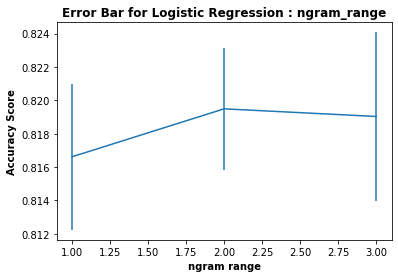

For Logistic Regression : ngram_range
	best model parameter value = 1.0
	best ngram value = 2
	with accuracy score = 0.8194898626553304


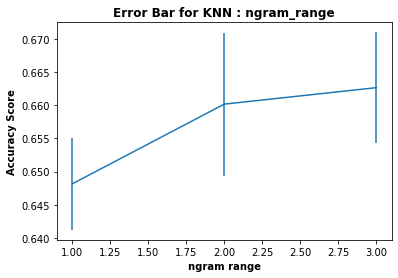

For KNN : ngram_range
	best model parameter value = 2.0
	best ngram value = 3
	with accuracy score = 0.6626553302812296


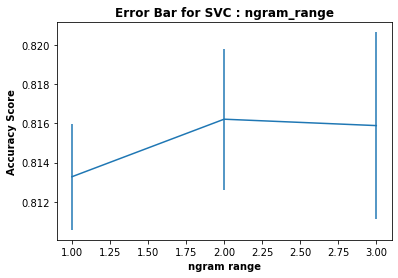

For SVC : ngram_range
	best model parameter value = 0.1
	best ngram value = 2
	with accuracy score = 0.8162197514715501


In [ ]:
#Cross-validation for ngram_range

max_ngram_range=[1,2,3]

ngram_accuracy_LR = []
ngram_accuracy_KNN = []
ngram_accuracy_SVC = []

for max_ngram_value in max_ngram_range:
    count_vector = CountVectorizer(max_features=2000, ngram_range=(1,max_ngram_value))
    X_cross_features = count_vector.fit_transform(X_document)
    X_cross_features.todense()
    ngram_accuracy_LR.append(cross_val_LR(X_cross_features,y_gender))
    ngram_accuracy_KNN.append(cross_val_KNN(X_cross_features,y_gender))
    ngram_accuracy_SVC.append(cross_val_SVC(X_cross_features,y_gender))

accuracy_errorbar(ngram_accuracy_LR,max_ngram_range,"ngram", "Logistic Regression : ngram_range")
accuracy_errorbar(ngram_accuracy_KNN,max_ngram_range,"ngram", "KNN : ngram_range")
accuracy_errorbar(ngram_accuracy_SVC,max_ngram_range,"ngram", "SVC : ngram_range")

**Cross-validation for Hyperparameters of the models**

Best hyperparameters for countVector

ngram - (1,2)

max_features - 5000

max_df = 0.6

min_df = 0

In [ ]:
#Vectorizing our dataset
from sklearn.feature_extraction.text import CountVectorizer

count_vec = CountVectorizer(max_features = 5000, ngram_range = (1,2), min_df = 0, max_df=0.6)

X_features = count_vec.fit_transform(X_document)
X_features.todense()

matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]])

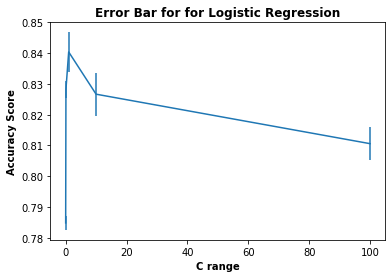

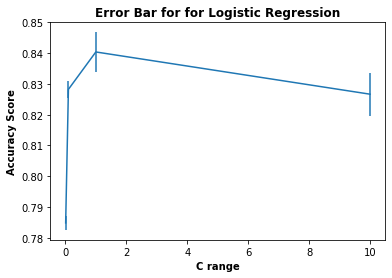

For Logistic Regression
	best value of C - 1
	with accuracy = 0.8404185742315239


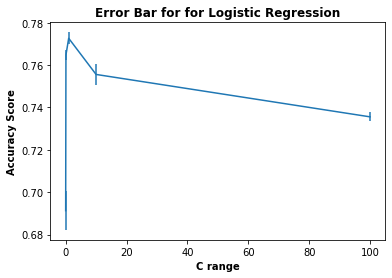

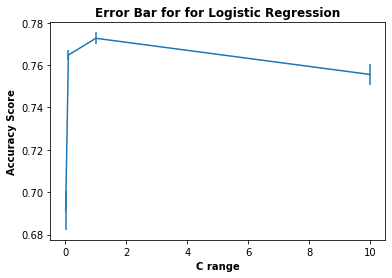

For Logistic Regression
	best value of C - 1
	with accuracy = 0.772661870503597


In [ ]:
#Error-bars for Logistic Regression C Value
from sklearn.linear_model import LogisticRegression

def error_bar_LR(X,y):
    '''
    This fucntion takes X data and y data, 
    trains Logistic regression model over the data
    then plots errorbar of mean accuracy and standard deviation in accuracy 
    values of different splits.
    It then gives the best parameter value with an accuracy score
    '''

    C_range = [0.01,0.1,1,10,100]

    mean_accuracy=[]
    std_accuracy=[]

    for C_value in C_range:
        temp=[]
        for train,test in kf.split(X):
            model = LogisticRegression(C=C_value, max_iter=2000).fit(X[train],y[train])
            prediction = model.predict(X[test])
            temp.append(accuracy_score(y[test],prediction))
        mean_accuracy.append(np.array(temp).mean())
        std_accuracy.append(np.array(temp).std())

    #Error bar for Logistic Regression
    error_plots(C_range,mean_accuracy,std_accuracy,"C range","for Logistic Regression")
    error_plots(C_range[:4],mean_accuracy[:4],std_accuracy[:4],"C range","for Logistic Regression")

    print("For Logistic Regression\n\tbest value of C - {}\n\twith accuracy = {}".
          format(C_range[mean_accuracy.index(max(mean_accuracy))],max(mean_accuracy)))

error_bar_LR(X_features,y_gender)

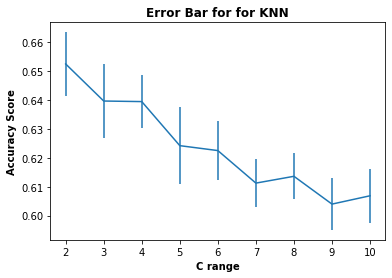

For KNN
	best value of K - 2
	with accuracy = 0.6524525833878352


In [ ]:
#Error bar for KNN
from sklearn.neighbors import KNeighborsClassifier

def error_bar_KNN(X,y):
    '''
    This fucntion takes X data and y data, 
    trains KNN model over the data
    then plots errorbar of mean accuracy and standard deviation in accuracy 
    values of different splits.
    It then gives the best parameter value with an accuracy score
    '''
    K_range = [2,3,4,5,6,7,8,9,10]

    mean_accuracy=[]
    std_accuracy=[]
    for K_value in K_range:
        temp=[]
        for train,test in kf.split(X):
            model = KNeighborsClassifier(n_neighbors=K_value).fit(X[train],y[train])
            prediction = model.predict(X[test])
            temp.append(accuracy_score(y[test],prediction))
        mean_accuracy.append(np.array(temp).mean())
        std_accuracy.append(np.array(temp).std())

    #Error bar for KNN
    error_plots(K_range,mean_accuracy,std_accuracy,"C range","for KNN")

    print("For KNN\n\tbest value of K - {}\n\twith accuracy = {}".
          format(K_range[mean_accuracy.index(max(mean_accuracy))],max(mean_accuracy)))
    
error_bar_KNN(X_features,y_gender)

0.01
0.1
1
10


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


100


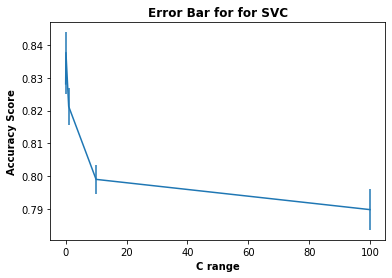

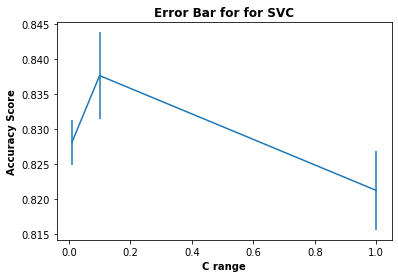

For SVC
	best value of C - 0.1
	with accuracy = 0.8376716808371484


In [ ]:
#Error bar for SVM C Value
from sklearn.svm import LinearSVC

def error_bar_SVC(X,y):
    '''
    This fucntion takes X data and y data, 
    trains SVC model over the data
    then plots errorbar of mean accuracy and standard deviation in accuracy 
    values of different splits.
    It then gives the best parameter value with an accuracy score
    '''

    C_range = [0.01,0.1,1,10,100]

    mean_accuracy=[]
    std_accuracy=[]

    for C_value in C_range:
        temp=[]
        print(C_value)
        for train,test in kf.split(X):
            model = LinearSVC(C=C_value,max_iter=1000).fit(X[train],y[train])
            prediction = model.predict(X[test])
            temp.append(accuracy_score(y[test],prediction))
        mean_accuracy.append(np.array(temp).mean())
        std_accuracy.append(np.array(temp).std())
    
    #Error bar for SVC
    error_plots(C_range,mean_accuracy,std_accuracy,"C range","for SVC")
    error_plots(C_range[:3],mean_accuracy[:3],std_accuracy[:3],"C range","for SVC")

    print("For SVC\n\tbest value of C - {}\n\twith accuracy = {}".
          format(C_range[mean_accuracy.index(max(mean_accuracy))],max(mean_accuracy)))
    
error_bar_SVC(X_features,y_gender)

**Model Training**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

X_train,X_test,y_train,y_test = train_test_split(X_features,y_gender,test_size=0.2)

In [ ]:
#Logistic Regression

from sklearn.linear_model import LogisticRegression
LR_model = LogisticRegression(C=1, max_iter=2000)
LR_model.fit(X_train,y_train)

LR_predict = LR_model.predict(X_test)

print("Logistic Regression accuracy score : {}".format(accuracy_score(y_test,LR_predict)))

Logistic Regression accuracy score : 0.8427076520601701


In [ ]:
print("Confusion matrix for Logistic Regression model - ")
print(confusion_matrix(y_test,LR_predict))

Confusion matrix for Logistic Regression model - 
[[1024  297]
 [ 184 1553]]


In [ ]:
#Did we over-fit

LR_model = LogisticRegression(C=1, max_iter=2000)
LR_model.fit(X_train,y_train)

LR_train_predict = LR_model.predict(X_train)

print("Logistic Regression training accuracy : {}".format(accuracy_score(y_train,LR_train_predict)))

Logistic Regression training accuracy : 0.9420372792674951


In [ ]:
#KNN

from sklearn.neighbors import KNeighborsClassifier

KNeighbor = KNeighborsClassifier(n_neighbors=2, weights='uniform')
KNeighbor.fit(X_train,y_train)

KNN_predict = KNeighbor.predict(X_test)

print("KNN : {}".format(accuracy_score(y_test,KNN_predict)))

KNN : 0.6386527141922825


In [ ]:
print("Confusion matrix for KNN model - ")
print(confusion_matrix(y_test,KNN_predict))

Confusion matrix for KNN model - 
[[ 740  581]
 [ 524 1213]]


In [ ]:
#SVM
from sklearn.svm import LinearSVC

SVC_model = LinearSVC(C=0.1,max_iter=2000) 
SVC_model.fit(X_train,y_train)

SVC_predict = SVC_model.predict(X_test)

print("SVC : {}".format(accuracy_score(y_test,SVC_predict)))

SVC : 0.8397645519947678


In [ ]:
print("Confusion matrix for SVC model - ")
print(confusion_matrix(y_test,SVC_predict))

Confusion matrix for SVC model - 
[[1021  300]
 [ 190 1547]]


In [ ]:
#Dummy classifier
from sklearn.dummy import DummyClassifier
dummy = DummyClassifier(strategy="most_frequent")

dummy.fit(X_train,y_train)
dummy_prediction = dummy.predict(X_test)

print("Dummy classifier accuracy score : {}".format(accuracy_score(y_test,dummy_prediction)))


Dummy classifier accuracy score : 0.5680183126226291


In [ ]:
print("Confusion matrix for Dummy classifier - ")
print(confusion_matrix(y_test,dummy_prediction))

Confusion matrix for Dummy classifier - 
[[   0 1321]
 [   0 1737]]


In [ ]:
def plot_roc(fpr,tpr,parameter):
    '''
    Creates ROC curves
    '''
    plt.plot(fpr,tpr,color='navy')
    plt.xlabel("False Positive Rate",fontweight='bold')
    plt.ylabel("True Positive Rate",fontweight='bold')
    plt.title("ROC Curve for "+parameter,fontweight='bold')
    plt.plot([0,1],[0,1],color='red',linestyle='--')
    plt.show()

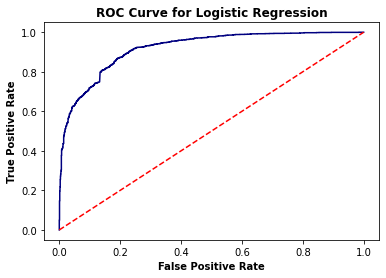

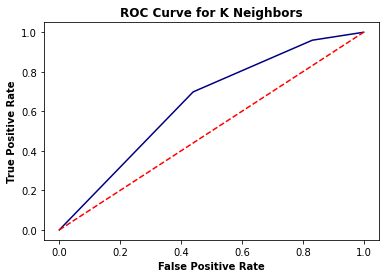

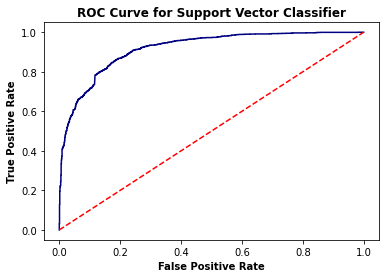

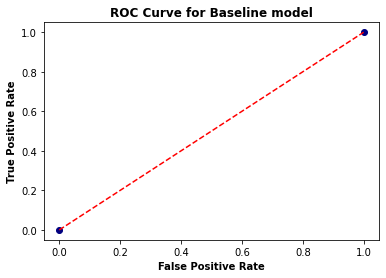

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_score

LR_fpr,LR_tpr,_ = roc_curve(y_test,LR_model.decision_function(X_test), pos_label=['Male'])
plot_roc(LR_fpr,LR_tpr,"Logistic Regression")


y_scores = KNeighbor.predict_proba(X_test)
KNN_fpr,KNN_tpr,_ = roc_curve(y_test,y_scores[:,1], pos_label=['Male'])      #y_scores col 1 -> prob estimate of + class
plot_roc(KNN_fpr,KNN_tpr,"K Neighbors")

SVC_fpr,SVC_tpr,_ = roc_curve(y_test,SVC_model.decision_function(X_test), pos_label=['Male'])
plot_roc(SVC_fpr, SVC_tpr, "Support Vector Classifier")

y_scores = dummy.predict_proba(X_test)
dummy_fpr,dummy_tpr,_ = roc_curve(y_test,y_scores[:,1],pos_label=['Male'])
plt.scatter(dummy_fpr,dummy_tpr,color='navy')
plt.xlabel("False Positive Rate",fontweight='bold')
plt.ylabel("True Positive Rate",fontweight='bold')
plt.title("ROC Curve for Baseline model",fontweight='bold')
plt.plot([0,1],[0,1],color='red',linestyle='--')
plt.show()

**Predicting Politician Name**

Cross-validation for countvectorization

0.4


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.5


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.6


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.7


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.8


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.9


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


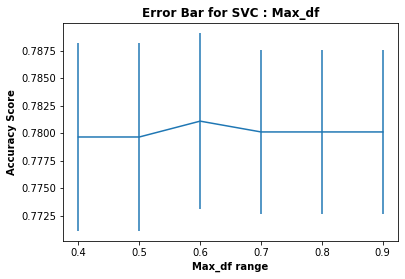

For SVC : Max_df
	best model parameter value = 0.1
	best Max_df value = 0.6
	with accuracy score = 0.7810987573577501


In [ ]:
#cross validation for Max_df
max_df_range = [0.4,0.5,0.6,0.7,0.8,0.9]


max_accuracy_LR = []
max_accuracy_KNN = []
max_accuracy_SVC = []

for max_df_value in max_df_range:
    print(max_df_value)
    count_vector = CountVectorizer(max_features=5000, ngram_range=(1,2), max_df = max_df_value)
    X_cross_features = count_vector.fit_transform(X_document)
    X_cross_features.todense()
    max_accuracy_LR.append(cross_val_LR(X_cross_features,y_person))
    max_accuracy_KNN.append(cross_val_KNN(X_cross_features,y_person))
    max_accuracy_SVC.append(cross_val_SVC(X_cross_features,y_person))

accuracy_errorbar(max_accuracy_LR,max_df_range,"Max_df", "Logistic Regression : Max_df")
accuracy_errorbar(max_accuracy_KNN,max_df_range,"Max_df", "KNN : Max_df")
accuracy_errorbar(max_accuracy_SVC,max_df_range,"Max_df", "SVC : Max_df")

0


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.1


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.2


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.3


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.4


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.5


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.6


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


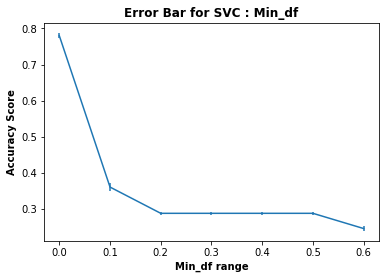

For SVC : Min_df
	best model parameter value = 0.1
	best Min_df value = 0
	with accuracy score = 0.780117724002616


In [ ]:
#cross validation for Min_df
min_df_range = [0,0.1,0.2,0.3,0.4,0.5,0.6]
min_accuracy_LR = []
min_accuracy_KNN = []
min_accuracy_SVC = []

for min_df_value in min_df_range:
    print(min_df_value)
    count_vector = CountVectorizer(max_features=5000, ngram_range=(1,2), min_df = min_df_value)
    X_cross_features = count_vector.fit_transform(X_document)
    X_cross_features.todense()
    min_accuracy_LR.append(cross_val_LR(X_cross_features,y_person))
    min_accuracy_KNN.append(cross_val_KNN(X_cross_features,y_person))
    min_accuracy_SVC.append(cross_val_SVC(X_cross_features,y_person))

accuracy_errorbar(min_accuracy_LR,min_df_range,"Min_df", "Logistic Regression : Min_df")
accuracy_errorbar(min_accuracy_KNN,min_df_range,"Min_df", "KNN : Min_df")
accuracy_errorbar(min_accuracy_SVC,min_df_range,"Min_df", "SVC : Min_df")

100


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


500


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


1000


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


2000


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


3000


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


5000


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


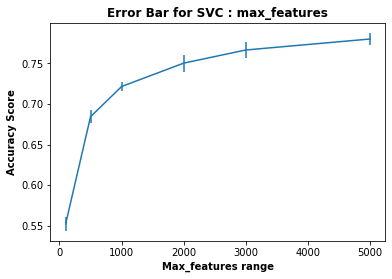

For SVC : max_features
	best model parameter value = 0.1
	best Max_features value = 5000
	with accuracy score = 0.780117724002616


In [ ]:
#cross validation for Max_features
max_features_range = [100,500,1000,2000,3000,5000]


features_accuracy_LR = []
features_accuracy_KNN = []
features_accuracy_SVC = []

for max_features_value in max_features_range:
    print(max_features_value)
    count_vector = CountVectorizer(max_features=max_features_value, ngram_range=(1,2))
    X_cross_features = count_vector.fit_transform(X_document)
    X_cross_features.todense()
    features_accuracy_LR.append(cross_val_LR(X_cross_features,y_person))
    features_accuracy_KNN.append(cross_val_KNN(X_cross_features,y_person))
    features_accuracy_SVC.append(cross_val_SVC(X_cross_features,y_person))

accuracy_errorbar(features_accuracy_LR,max_features_range,"Max_features", "Logistic Regression : max_features")
accuracy_errorbar(features_accuracy_KNN,max_features_range,"Max_features", "KNN : max_features")
accuracy_errorbar(features_accuracy_SVC,max_features_range,"Max_features", "SVC : max_features")

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


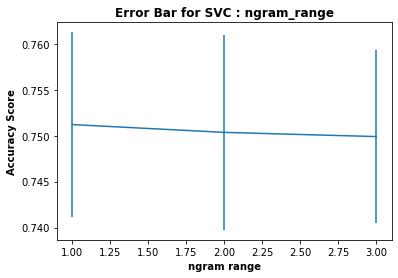

For SVC : ngram_range
	best model parameter value = 0.1
	best ngram value = 1
	with accuracy score = 0.7512099411379987


In [ ]:
#Cross-validation for ngram_range

max_ngram_range=[1,2,3]

ngram_accuracy_LR = []
ngram_accuracy_KNN = []
ngram_accuracy_SVC = []

for max_ngram_value in max_ngram_range:
    count_vector = CountVectorizer(max_features=2000, ngram_range=(1,max_ngram_value))
    X_cross_features = count_vector.fit_transform(X_document)
    X_cross_features.todense()
    ngram_accuracy_LR.append(cross_val_LR(X_cross_features,y_person))
    ngram_accuracy_KNN.append(cross_val_KNN(X_cross_features,y_person))
    ngram_accuracy_SVC.append(cross_val_SVC(X_cross_features,y_person))

accuracy_errorbar(ngram_accuracy_LR,max_ngram_range,"ngram", "Logistic Regression : ngram_range")
accuracy_errorbar(ngram_accuracy_KNN,max_ngram_range,"ngram", "KNN : ngram_range")
accuracy_errorbar(ngram_accuracy_SVC,max_ngram_range,"ngram", "SVC : ngram_range")

Model Selection

In [ ]:
#Vectorizing our dataset
from sklearn.feature_extraction.text import CountVectorizer
count_vec = CountVectorizer(max_features = 5000, ngram_range = (1,1), min_df = 0, max_df=0.6)

X_features = count_vec.fit_transform(X_document)
X_features.todense()


matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]])

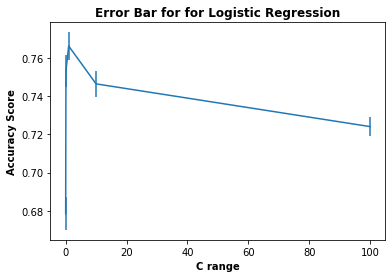

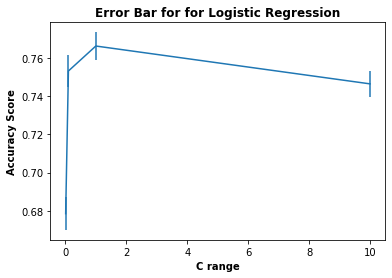

For Logistic Regression
	best value of C - 1
	with accuracy = 0.7662524525833879


In [ ]:
#Error-bars for Logistic Regression C Value
from sklearn.linear_model import LogisticRegression

def error_bar_LR(X,y):

    C_range = [0.01,0.1,1,10,100]

    mean_accuracy=[]
    std_accuracy=[]

    for C_value in C_range:
        temp=[]
        for train,test in kf.split(X):
            model = LogisticRegression(C=C_value, max_iter=2000).fit(X[train],y[train])
            prediction = model.predict(X[test])
            temp.append(accuracy_score(y[test],prediction))
        mean_accuracy.append(np.array(temp).mean())
        std_accuracy.append(np.array(temp).std())

    #Error bar for Logistic Regression
    error_plots(C_range,mean_accuracy,std_accuracy,"C range","for Logistic Regression")
    error_plots(C_range[:4],mean_accuracy[:4],std_accuracy[:4],"C range","for Logistic Regression")

    print("For Logistic Regression\n\tbest value of C - {}\n\twith accuracy = {}".
          format(C_range[mean_accuracy.index(max(mean_accuracy))],max(mean_accuracy)))

error_bar_LR(X_features,y_person)

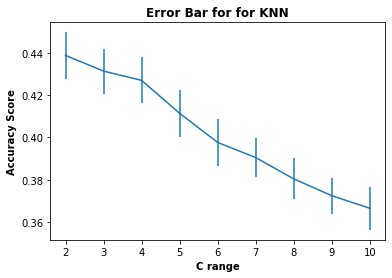

For KNN
	best value of K - 2
	with accuracy = 0.4387181164159582


In [ ]:
#Error bar for KNN
from sklearn.neighbors import KNeighborsClassifier

def error_bar_KNN(X,y):
    K_range = [2,3,4,5,6,7,8,9,10]

    mean_accuracy=[]
    std_accuracy=[]
    for K_value in K_range:
        temp=[]
        for train,test in kf.split(X):
            model = KNeighborsClassifier(n_neighbors=K_value).fit(X[train],y[train])
            prediction = model.predict(X[test])
            temp.append(accuracy_score(y[test],prediction))
        mean_accuracy.append(np.array(temp).mean())
        std_accuracy.append(np.array(temp).std())

    #Error bar for KNN
    error_plots(K_range,mean_accuracy,std_accuracy,"C range","for KNN")

    print("For KNN\n\tbest value of K - {}\n\twith accuracy = {}".
          format(K_range[mean_accuracy.index(max(mean_accuracy))],max(mean_accuracy)))

error_bar_KNN(X_features,y_person)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


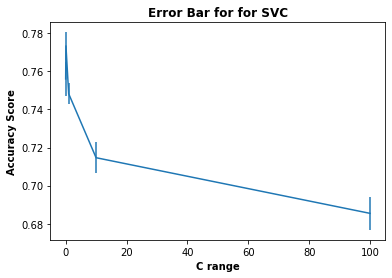

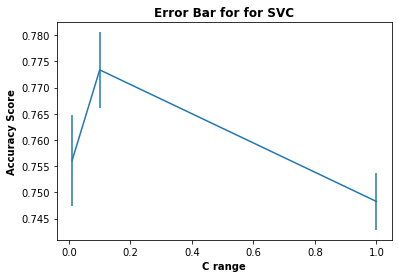

For SVC
	best value of C - 0.1
	with accuracy = 0.7733812949640289


In [ ]:
#Error bar for SVM C Value
from sklearn.svm import LinearSVC

def error_bar_SVC(X,y):

    C_range = [0.01,0.1,1,10,100]

    mean_accuracy=[]
    std_accuracy=[]

    for C_value in C_range:
        temp=[]
        for train,test in kf.split(X):
            model = LinearSVC(C=C_value,max_iter=1000).fit(X[train],y[train])
            prediction = model.predict(X[test])
            temp.append(accuracy_score(y[test],prediction))
        mean_accuracy.append(np.array(temp).mean())
        std_accuracy.append(np.array(temp).std())
    
    #Error bar for SVC
    error_plots(C_range,mean_accuracy,std_accuracy,"C range","for SVC")
    error_plots(C_range[:3],mean_accuracy[:3],std_accuracy[:3],"C range","for SVC")

    print("For SVC\n\tbest value of C - {}\n\twith accuracy = {}".
          format(C_range[mean_accuracy.index(max(mean_accuracy))],max(mean_accuracy)))

error_bar_SVC(X_features,y_person)

Training models

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

X_train,X_test,y_train,y_test = train_test_split(X_features,y_person,test_size=0.2)

In [ ]:
#Logistic Regression

from sklearn.linear_model import LogisticRegression
LR_model = LogisticRegression(C=1, max_iter=2000)
LR_model.fit(X_train,y_train)

LR_predict = LR_model.predict(X_test)

print("Logistic Regression accuracy score : {}".format(accuracy_score(y_test,LR_predict)))

Logistic Regression accuracy score : 0.7596468279921518


In [ ]:
print("Confusion matrix for Logistic Regression model - ")
print(confusion_matrix(y_test,LR_predict))

Confusion matrix for Logistic Regression model - 
[[466  14  38   9  21  17]
 [  4 569  21  14  11   2]
 [ 27  49 321  42  70   5]
 [ 15  32  44 421  58   1]
 [ 15  16  62  58 380   6]
 [ 14  10  13   6  11 196]]


In [ ]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
KNeighbor = KNeighborsClassifier(n_neighbors=2, weights='uniform')
KNeighbor.fit(X_train,y_train)
KNN_predict = KNeighbor.predict(X_test)
print("KNN : {}".format(accuracy_score(y_test,KNN_predict)))

KNN : 0.41137998691955524


In [ ]:
print("Confusion matrix for KNN model - ")
print(confusion_matrix(y_test,KNN_predict))

Confusion matrix for KNN model - 
[[449  88  22   4   1   1]
 [150 445  20   6   0   0]
 [165 246  86  12   5   0]
 [120 181  80 176  14   0]
 [168 175  87  52  55   0]
 [ 97  76  20   6   4  47]]


In [ ]:
#SVM
from sklearn.svm import LinearSVC

SVC_model = LinearSVC(C=0.1,max_iter=2000)
SVC_model.fit(X_train,y_train)

SVC_predict = SVC_model.predict(X_test)

print("SVC accuracy score : {}".format(accuracy_score(y_test,SVC_predict)))

SVC accuracy score : 0.7710922171353826


In [ ]:
print("Confusion matrix for SVC model - ")
print(confusion_matrix(y_test,SVC_predict))

Confusion matrix for SVC model - 
[[472  16  18  13  19  26]
 [  7 556   8  18   8   1]
 [ 20  46 313  44  58   7]
 [ 19  38  29 489  62   9]
 [ 18  29  51  75 365   5]
 [ 25   7  12   5   7 163]]


In [ ]:
#Did we over-fit

SVC_model = LinearSVC(C=0.1, max_iter=2000)
SVC_model.fit(X_train,y_train)

SVC_train_predict = SVC_model.predict(X_train)

print("SVC training accuracy : {}".format(accuracy_score(y_train,SVC_train_predict)))

SVC training accuracy : 0.9355788096795291


In [ ]:
#Dummy classifier
from sklearn.dummy import DummyClassifier
dummy = DummyClassifier(strategy="most_frequent")

dummy.fit(X_train,y_train)
dummy_prediction = dummy.predict(X_test)

print("Dummy classifier accuracy score : {}".format(accuracy_score(y_test,dummy_prediction)))


Dummy classifier accuracy score : 0.1867233485938522


In [ ]:
print("Confusion matrix for Dummy classifier - ")
print(confusion_matrix(y_test,dummy_prediction))

Confusion matrix for Dummy classifier - 
[[  0   0   0 565   0   0]
 [  0   0   0 621   0   0]
 [  0   0   0 514   0   0]
 [  0   0   0 571   0   0]
 [  0   0   0 537   0   0]
 [  0   0   0 250   0   0]]
